In [1]:
import dask.dataframe as dd
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
instance = "stndrd10"

In [3]:
df = dd.read_csv(f"../results/{instance}*.csv", sep=";")

In [4]:
df_mem = df.compute()
display(df_mem)

,nodes,arcs,algorithm,t0,tf,it,lambda,cost,total_time
0,300,6320,1,14867566.5,1000.0,15,0.79,148414513,58.673865
1,300,6320,1,49558555.0,1000.0,15,0.79,146849606,64.097135
2,300,6320,1,14867566.5,10000.0,15,0.79,147178231,42.978391
3,300,6320,1,49558555.0,10000.0,15,0.79,147756319,51.146189
4,300,6320,1,14867566.5,100000.0,15,0.79,148529659,30.523651
...,...,...,...,...,...,...,...,...,...
115,300,6320,2,49558555.0,1000.0,30,0.99,145474049,2733.236245
116,300,6320,2,14867566.5,10000.0,30,0.99,145418584,1842.998729
117,300,6320,2,49558555.0,10000.0,30,0.99,145567638,2150.074082
118,300,6320,2,14867566.5,100000.0,30,0.99,145419337,1266.334708


In [5]:
def concatenate(row):
    cols = ["algorithm", "t0", "tf", "it", "lambda"]
    x = [str(row[y]) for y in cols]
    response = {}
    response["setting"] = " ".join(x)
    response["Vecindad"] = "Algoritmo 1" if row.algorithm == 1.0 else "Algoritmo 2"
    response["cost"] = row.cost
    response["total_time"] = row.total_time
    return pd.Series(response)

In [6]:
solutions = df_mem.apply(concatenate, axis=1)

In [7]:
display(solutions)

,setting,Vecindad,cost,total_time
0,1.0 14867566.5 1000.0 15.0 0.79,Algoritmo 1,148414513.0,58.673865
1,1.0 49558555.0 1000.0 15.0 0.79,Algoritmo 1,146849606.0,64.097135
2,1.0 14867566.5 10000.0 15.0 0.79,Algoritmo 1,147178231.0,42.978391
3,1.0 49558555.0 10000.0 15.0 0.79,Algoritmo 1,147756319.0,51.146189
4,1.0 14867566.5 100000.0 15.0 0.79,Algoritmo 1,148529659.0,30.523651
...,...,...,...,...
115,2.0 49558555.0 1000.0 30.0 0.99,Algoritmo 2,145474049.0,2733.236245
116,2.0 14867566.5 10000.0 30.0 0.99,Algoritmo 2,145418584.0,1842.998729
117,2.0 49558555.0 10000.0 30.0 0.99,Algoritmo 2,145567638.0,2150.074082
118,2.0 14867566.5 100000.0 30.0 0.99,Algoritmo 2,145419337.0,1266.334708


In [8]:
def stats_by_configration(group):
    response = {}
    
    response["time_mean"] = group.total_time.mean()
    response["time_min"] = group.total_time.min()
    response["time_max"] = group.total_time.max()
    response["time_sd"] = group.total_time.std()
    response["time_median"] = group.total_time.median()
    
    response["cost_mean"] = group.cost.mean()
    response["cost_min"] = group.cost.min()
    response["cost_max"] = group.cost.max()
    response["cost_sd"] = group.cost.std()
    response["cost_median"] = group.cost.median()
    
    response["Vecindad"] = group.Vecindad.values[0]
    
    return pd.Series(response)

In [9]:
stats = solutions.groupby("setting").apply(stats_by_configration).reset_index()

In [10]:
display(stats)

,setting,time_mean,time_min,time_max,time_sd,time_median,cost_mean,cost_min,cost_max,cost_sd,cost_median,Vecindad
0,1.0 14867566.5 1000.0 15.0 0.79,57.232766,45.659730,64.043749,4.221451,58.292791,1.474852e+08,145784684.0,148457656.0,6.905669e+05,147576571.5,Algoritmo 1
1,1.0 14867566.5 1000.0 15.0 0.84,74.547125,59.655538,86.553034,8.338297,79.276966,1.472313e+08,145765472.0,148414221.0,7.449594e+05,147315919.0,Algoritmo 1
2,1.0 14867566.5 1000.0 15.0 0.89,111.170492,86.704409,128.206190,11.187569,117.417615,1.470511e+08,145598299.0,148253835.0,7.098390e+05,147049632.5,Algoritmo 1
3,1.0 14867566.5 1000.0 15.0 0.94,210.741662,163.093850,241.852171,18.815442,219.731715,1.466360e+08,145639316.0,148023802.0,5.634667e+05,146693585.5,Algoritmo 1
4,1.0 14867566.5 1000.0 15.0 0.99,1337.370717,1202.219778,1634.256324,105.014501,1339.027184,1.458837e+08,145460109.0,146493801.0,2.688574e+05,145838074.5,Algoritmo 1
...,...,...,...,...,...,...,...,...,...,...,...,...
235,2.0 49558555.0 100000.0 30.0 0.79,69.182501,53.769575,80.768018,7.050530,71.657849,1.468303e+08,145430635.0,148748975.0,1.041173e+06,146930148.0,Algoritmo 2
236,2.0 49558555.0 100000.0 30.0 0.84,91.717532,71.226470,106.170301,9.541993,95.063891,1.466231e+08,145418434.0,148736418.0,9.829358e+05,146282649.5,Algoritmo 2
237,2.0 49558555.0 100000.0 30.0 0.89,137.290210,105.424184,157.261230,14.272447,142.204410,1.462830e+08,145406167.0,148741268.0,8.147291e+05,145989781.5,Algoritmo 2
238,2.0 49558555.0 100000.0 30.0 0.94,257.970627,197.897269,298.849961,26.080924,270.653895,1.460899e+08,145412205.0,147863185.0,6.222564e+05,145918966.5,Algoritmo 2


# Get top 10 by mean cost and mean time

In [40]:
top_mean_cost = stats.sort_values(by=["cost_mean"], ascending=True)[0:5]
top_mean_cost_time = stats[stats.time_mean < 500].sort_values(by=["cost_mean"], ascending=True)[0:5]

In [41]:
top_mean_cost_time

,setting,time_mean,time_min,time_max,time_sd,time_median,cost_mean,cost_min,cost_max,cost_sd,cost_median,Vecindad
193,2.0 49558555.0 1000.0 25.0 0.94,370.456119,285.862717,431.555903,38.459881,385.123706,1.455620e+08,145400229.0,146051621.0,173791.433730,145491584.5,Algoritmo 2
198,2.0 49558555.0 1000.0 30.0 0.94,445.211735,343.241404,517.582626,44.956112,461.794444,1.455756e+08,145400229.0,146022079.0,168033.707712,145522913.0,Algoritmo 2
188,2.0 49558555.0 1000.0 20.0 0.94,297.195330,229.365049,344.221635,31.403889,308.077486,1.456126e+08,145400229.0,146208609.0,206359.629834,145544289.0,Algoritmo 2
138,2.0 14867566.5 1000.0 30.0 0.94,395.992871,306.727511,461.095748,40.707616,411.669542,1.456126e+08,145406192.0,146001916.0,170285.879461,145587387.0,Algoritmo 2
133,2.0 14867566.5 1000.0 25.0 0.94,330.695032,254.495202,383.941876,34.615737,343.329723,1.456205e+08,145400229.0,146252303.0,202854.549768,145553983.0,Algoritmo 2


In [21]:
def transform(df):
    response = {}
    a = df.setting.split()
    response["alg"] = int(float(a[0]))
    response["T0"] = "frac{S0}{2}" if float(a[1]) % 10 == 0 else "frac{S0}{10}"
    print(round(df.cost_mean, 3), round(df.time_mean, 3))
    response["Tf"] = a[2]
    response["it"] = int(float(a[3]))
    response["beta"] = a[4]
    response["cost_mean"] = round(df.cost_mean, 3)
    #response["cost_sd"] = round(df.cost_sd, 3)
    response["time_mean"] = round(df.time_mean, 3)
    #response["time_sd"] = round(df.time_sd, 3)
    return pd.Series(response)

In [42]:
top_mean_cost_time[0:5].apply(transform, axis=1)#.to_csv("top_costs_stndr10.csv")

145562035.76 370.456
145562035.76 370.456
145575591.7 445.212
145612550.06 297.195
145612617.34 395.993
145620529.44 330.695


,alg,T0,Tf,it,beta,cost_mean,time_mean
193,2,frac{S0}{10},1000.0,25,0.94,1.455620e+08,370.456
198,2,frac{S0}{10},1000.0,30,0.94,1.455756e+08,445.212
188,2,frac{S0}{10},1000.0,20,0.94,1.456126e+08,297.195
138,2,frac{S0}{10},1000.0,30,0.94,1.456126e+08,395.993
133,2,frac{S0}{10},1000.0,25,0.94,1.456205e+08,330.695


In [43]:
# 2.0 14867566.5 1000.0 30.0 0.99
top_mean_cost.setting.values

array(['2.0 14867566.5 1000.0 30.0 0.99',
       '2.0 49558555.0 1000.0 25.0 0.99',
       '2.0 49558555.0 1000.0 20.0 0.99',
       '2.0 14867566.5 1000.0 25.0 0.99',
       '2.0 49558555.0 1000.0 30.0 0.99'], dtype=object)

In [44]:
top_costs = solutions[solutions.setting.isin(top_mean_cost.setting.values)]
top_costs_time = solutions[solutions.setting.isin(top_mean_cost_time.setting.values)]

Text(0, 0.5, 'Configuración')

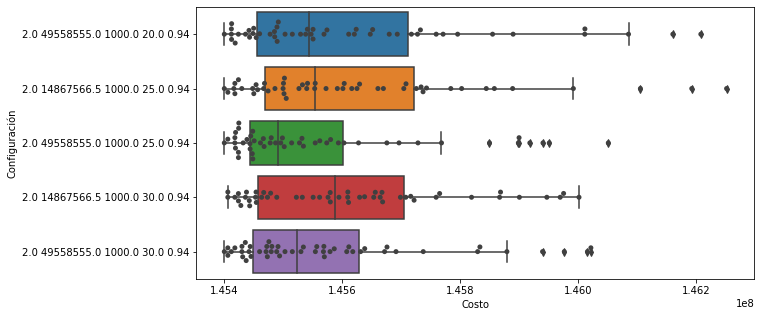

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="cost", y="setting", data=top_costs_time)
ax = sns.swarmplot(x="cost", y="setting", data=top_costs_time, color=".25")
ax.set_xlabel("Costo")
ax.set_ylabel("Configuración")

Text(0, 0.5, 'Configuración')

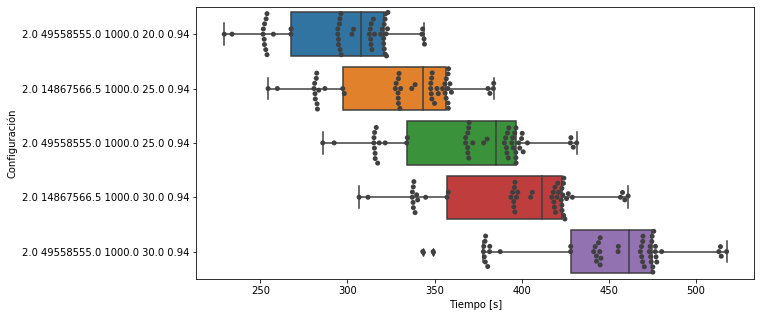

In [46]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x="total_time", y="setting", data=top_costs_time)
ax = sns.swarmplot(x="total_time", y="setting", data=top_costs_time, color=".25")
ax.set_xlabel("Tiempo [s]")
ax.set_ylabel("Configuración")

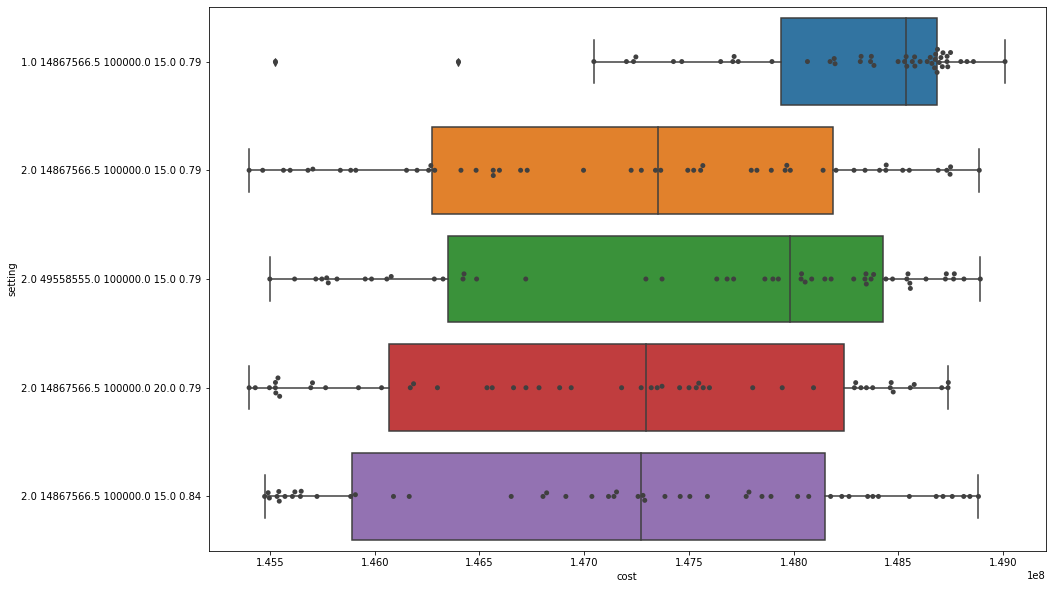

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.boxplot(x="cost", y="setting", data=top_costs_time)
ax = sns.swarmplot(x="cost", y="setting", data=top_costs_time, color=".25")

In [35]:
top_mean_cost_time

,setting,time_mean,time_min,time_max,time_sd,time_median,cost_mean,cost_min,cost_max,cost_sd,cost_median,Vecindad
160,2.0 14867566.5 100000.0 15.0 0.79,28.642440,21.888493,33.660919,3.012901,29.650787,1.472232e+08,145400229.0,148886309.0,1.078419e+06,147352888.0,Algoritmo 2
40,1.0 14867566.5 100000.0 15.0 0.79,30.530817,24.163235,34.231644,2.321417,31.283537,1.482339e+08,145525877.0,149009359.0,6.946937e+05,148538736.0,Algoritmo 1
220,2.0 49558555.0 100000.0 15.0 0.79,35.172370,26.748437,43.115365,3.800843,36.251127,1.475025e+08,145499043.0,148891226.0,1.130141e+06,147981227.5,Algoritmo 2
161,2.0 14867566.5 100000.0 15.0 0.84,37.084347,28.976882,43.384964,3.793244,38.224494,1.471357e+08,145474265.0,148882443.0,1.156391e+06,147268979.0,Algoritmo 2
165,2.0 14867566.5 100000.0 20.0 0.79,37.696309,29.100666,43.852954,3.812141,39.058972,1.470948e+08,145400229.0,148738491.0,1.117338e+06,147296099.5,Algoritmo 2


In [ ]:
stats.to_csv("juanito.csv")

In [2]:
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.scatterplot(x="time_mean",
                     y="cost_mean",
                     hue="Vecindad",
                     data=stats,
                    legend="full")
g.set_ylabel("Costo promedio")
g.set_xlabel("Tiempo promedio [s]")

NameError: name 'plt' is not defined

In [ ]:
mask = (stats.time_mean > 900) & (stats.time_mean < 1000)
stats[mask].sort_values(by=["time_mean"], ascending=True)

algorithm	t0	tf	it	lambda

2	14867566.5	1000	30	0.99 best

1	14867566.5	100000	15	0.79 worst

1	49558555	1000	30	0.94 mid

2	14867566.5	10000	15	0.99 mid

In [ ]:
10**3

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.scatterplot(x="time_mean", y="cost_mean", data=stats)

In [ ]:
import os

In [ ]:
results = []
for i, el in enumerate(os.listdir("../output/")):
    if instance in el and "costs" in el:
        print(el)
        aux = pd.read_csv(f"../output/{el}", index_col=False)
        aux["setting"] = f"{el[14:-4]}"
        del aux["Unnamed: 0"]
        results.append(aux)

In [ ]:
results

In [ ]:
some_solutions = pd.concat(results)

In [ ]:
some_solutions

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.scatterplot(x="x",
                     y="costs",
                     hue="setting",
                     data=some_solutions,
                     edgecolor=None,
                     s = 1)
ax.set_ylabel("Costo")
ax.set_xlabel("Iteraciones")